# Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import RandomOverSampler

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, callbacks
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

# Load data

In [2]:
df = pd.read_csv('asthma_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


# Data preprocessing

In [3]:
# Dropping irrelevant columns
df = df.drop(['PatientID', 'DoctorInCharge'], axis = 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies      2392 non-null   

In [5]:
df[df.duplicated()].shape[0]

0

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,42.137960,21.606655,5.000000,23.000000,42.000000,61.000000,79.000000
Gender,2392.0,0.493311,0.500060,0.000000,0.000000,0.000000,1.000000,1.000000
Ethnicity,2392.0,0.669732,0.986120,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2392.0,1.307274,0.898242,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2392.0,27.244877,7.201628,15.031803,20.968313,27.052202,33.555903,39.985611
Smoking,2392.0,0.141722,0.348838,0.000000,0.000000,0.000000,0.000000,1.000000
PhysicalActivity,2392.0,5.051786,2.903574,0.001740,2.578333,5.016881,7.540234,9.995809
DietQuality,2392.0,5.022867,2.909980,0.003031,2.432043,5.115383,7.544216,9.999904
SleepQuality,2392.0,7.019012,1.732475,4.001437,5.498500,6.975839,8.526950,9.996235
PollutionExposure,2392.0,5.013030,2.935605,0.001022,2.432559,5.036519,7.630037,9.998964


# Exploratory Data Analysis, EDA

In [7]:
df_copy = df.copy()
df_copy['Gender'] = np.where(df_copy['Gender'] == 1, 'female', 'male')
df_copy['Diagnosis'] = np.where(df_copy['Diagnosis'] == 1, 'Yes', 'No')
df_copy['Smoking'] = np.where(df_copy['Smoking'] == 1, 'Yes', 'No')

<Axes: xlabel='Diagnosis', ylabel='count'>

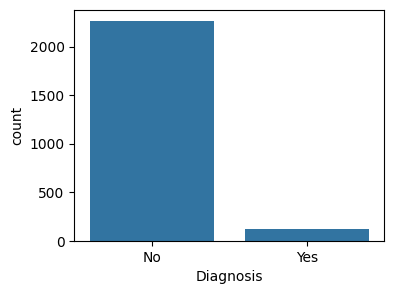

In [8]:
# How many asthmatics vs. non-asthmatics exist in data.
fig, ax = plt.subplots(figsize=(4, 3))
sns.countplot(x = 'Diagnosis', data = df_copy)

In [9]:
df_copy.groupby('Diagnosis').Diagnosis.count()

Diagnosis
No     2268
Yes     124
Name: Diagnosis, dtype: int64

<Axes: xlabel='Diagnosis', ylabel='count'>

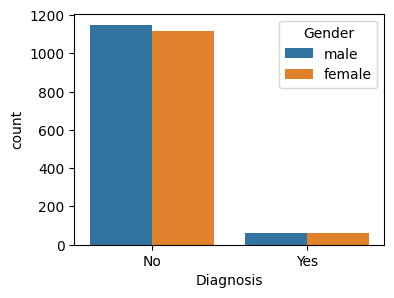

In [10]:
# Asthma rates between the Male and Female.
fig, ax = plt.subplots(figsize=(4, 3))
sns.countplot(x = 'Diagnosis', hue = 'Gender', data = df_copy)

<Axes: xlabel='Diagnosis', ylabel='count'>

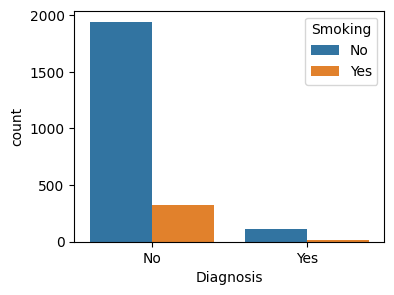

In [11]:
# Asthma rates between the smoking vs. non-smoking.
fig, ax = plt.subplots(figsize=(4, 3))
sns.countplot(x = 'Diagnosis', hue = 'Smoking', data = df_copy)

(array([16., 13., 15.,  7., 16., 11.,  8., 12., 12., 14.]),
 array([ 5. , 12.4, 19.8, 27.2, 34.6, 42. , 49.4, 56.8, 64.2, 71.6, 79. ]),
 <BarContainer object of 10 artists>)

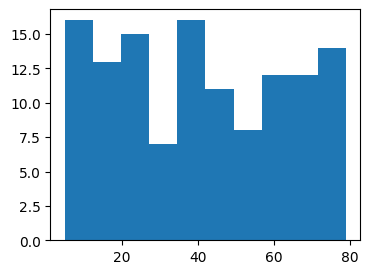

In [12]:
# Distribution of asthmatics age.
fig, ax = plt.subplots(figsize=(4, 3))
plt.hist(df_copy[df_copy['Diagnosis'] == 'Yes']['Age'])

# Building model

In [13]:
X = df.drop(['Diagnosis'], axis = 1)
y = df['Diagnosis']

OverS = RandomOverSampler(random_state = 24)
X, y = OverS.fit_resample(X, y)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, # (0.001)minimium amount of change to count as an improvement
    patience = 10,     #(20) how many epochs to wait before stopping
    restore_best_weights = True,
)

model = keras.Sequential([
    layers.Dense(512, activation = 'relu', input_shape = [X_train.shape[1]]),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = RMSprop(learning_rate = 0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']    
)

# Training model

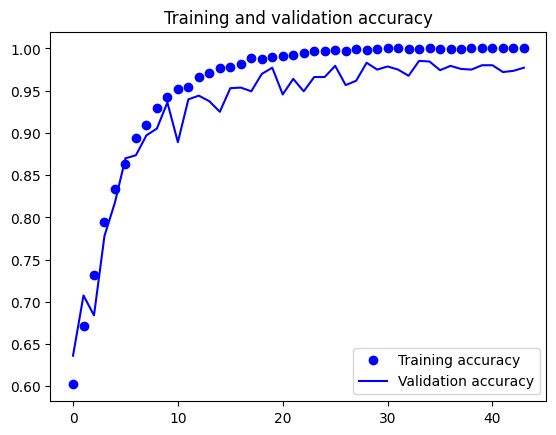

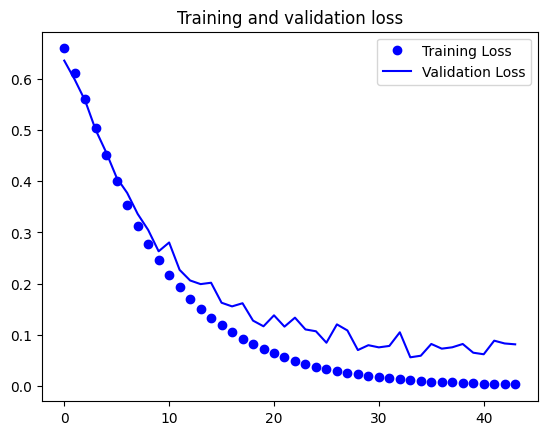

In [15]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    batch_size = 20,
    epochs = 500,
    callbacks = [early_stopping],
    verbose=0
)

# Getting the accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the accuracy
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Plotting the loss
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Testing model

In [16]:
y_pred = np.where(model.predict(X_test) >= 0.5, 1, 0)

43/43 [==============================] - 0s 2ms/step


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       703
           1       0.97      1.00      0.99       658

    accuracy                           0.99      1361
   macro avg       0.99      0.99      0.99      1361
weighted avg       0.99      0.99      0.99      1361



In [18]:
model_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred),
                               columns = ['Predicted (No)', 'Predicted (Yes)'],
                               index = ['Actual (No)', 'Actual (Yes)'])
model_matrix_df

,Predicted (No),Predicted (Yes)
Actual (No),683,20
Actual (Yes),0,658


In [20]:
%pip install xgboost
%pip install lightgbm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print(classification_report(y_test, y_pred_decision_tree))

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))
print(classification_report(y_test, y_pred_random_forest))

# Gradient Boosting (XGBoost)
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred_xgboost = xgboost.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgboost))
print(classification_report(y_test, y_pred_xgboost))

# Gradient Boosting (LightGBM)
lightgbm = LGBMClassifier()
lightgbm.fit(X_train, y_train)
y_pred_lightgbm = lightgbm.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lightgbm))
print(classification_report(y_test, y_pred_lightgbm))

# Support Vector Machines (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Neural Network
nn_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached lightgbm-4.5.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.5.0-py3-none-win_amd64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Logistic Regression Accuracy: 0.5731080088170463
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       703
           1       0.56      0.54      0.55       658

    accuracy                           0.57      1361
   macro avg       0.57      0.57      0.57      1361
weighted avg       0.57      0.57      0.57      1361

Decision Tree Accuracy: 0.9493019838354151
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       703
           1       0.91      1.00      0.95       658

    accuracy                           0.95      1361
   macro avg       0.95      0.95      0.95      1361
weighted avg       0.95      0.95      0.95      1361

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       703
           1       1.00      1.00      1.00       658

    accuracy                           1.00      1361
   macro

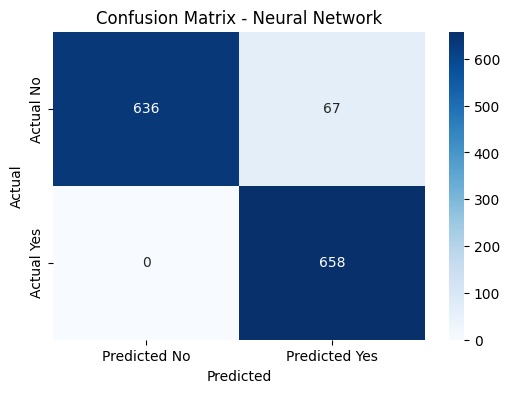

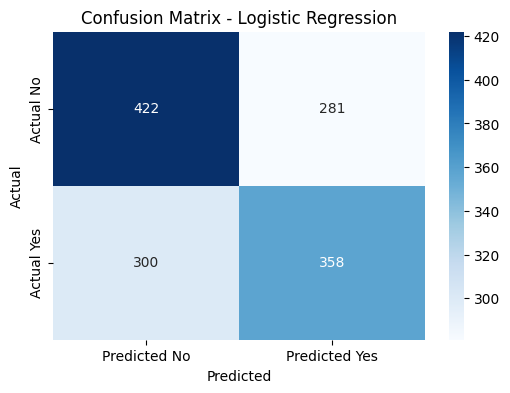

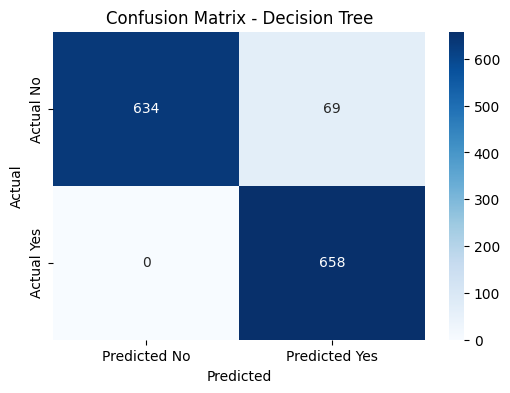

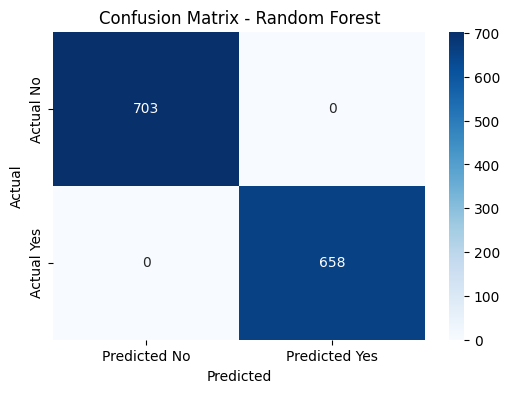

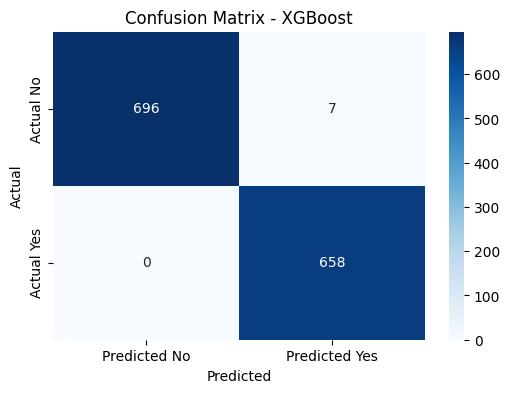

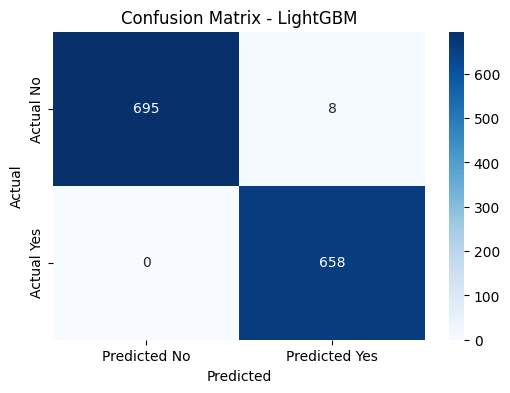

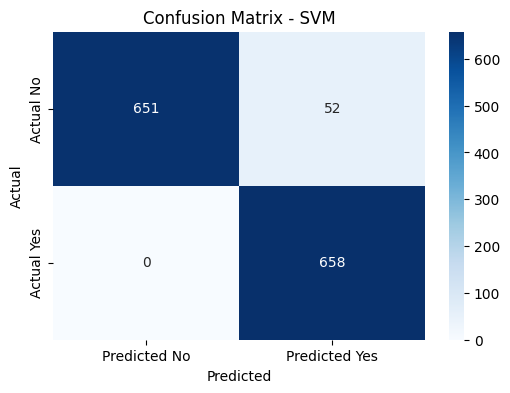

In [21]:
# Plot confusion matrix for the neural network model
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for the logistic regression model
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for the decision tree model
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for the random forest model
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_random_forest, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for the XGBoost model
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgboost, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for the LightGBM model
conf_matrix_lightgbm = confusion_matrix(y_test, y_pred_lightgbm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lightgbm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - LightGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for the SVM model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

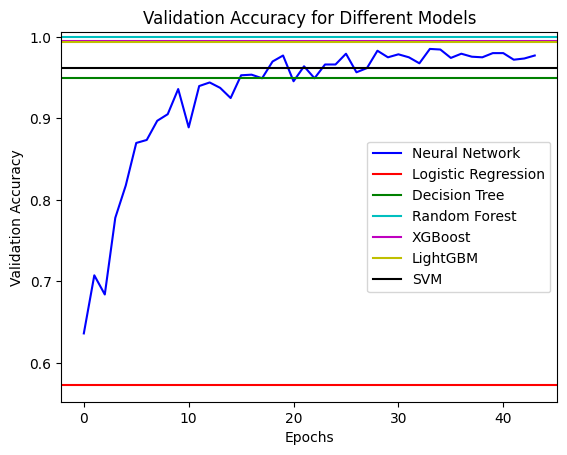

In [23]:
# Plotting the validation accuracy for all models

# Neural Network
plt.plot(epochs, val_acc, 'b', label='Neural Network')

# Logistic Regression
log_reg_val_acc = log_reg.score(X_test, y_test)
plt.axhline(y=log_reg_val_acc, color='r', linestyle='-', label='Logistic Regression')

# Decision Tree
decision_tree_val_acc = decision_tree.score(X_test, y_test)
plt.axhline(y=decision_tree_val_acc, color='g', linestyle='-', label='Decision Tree')

# Random Forest
random_forest_val_acc = random_forest.score(X_test, y_test)
plt.axhline(y=random_forest_val_acc, color='c', linestyle='-', label='Random Forest')

# XGBoost
xgboost_val_acc = xgboost.score(X_test, y_test)
plt.axhline(y=xgboost_val_acc, color='m', linestyle='-', label='XGBoost')

# LightGBM
lightgbm_val_acc = lightgbm.score(X_test, y_test)
plt.axhline(y=lightgbm_val_acc, color='y', linestyle='-', label='LightGBM')

# SVM
svm_val_acc = svm.score(X_test, y_test)
plt.axhline(y=svm_val_acc, color='k', linestyle='-', label='SVM')

plt.title('Validation Accuracy for Different Models')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()